In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,validation_curve,GridSearchCV
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [4]:
data=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\PROCESS_DATASET\crop_recommendation_processed.csv")

In [5]:
x,y=data.iloc[:,:-1],data['label']

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 5, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 5),
        'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'random_state': 42
    }

    model = RandomForestClassifier(**params)
    scores = cross_val_score(model, xtrain, ytrain, cv=KFold(5), scoring='accuracy')
    return scores.mean()


In [49]:
study = optuna.create_study(direction='maximize',study_name='random_forest_study',storage=r'sqlite:///C:/Users/Avijit/Desktop/AgriAssure/CROP_RECOMMENDATION/RESULT/random_forest/random_forest_study.db'
)
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)


[I 2025-07-02 12:50:09,812] A new study created in RDB with name: random_forest_study
[I 2025-07-02 12:50:10,521] Trial 0 finished with value: 0.8892045454545453 and parameters: {'n_estimators': 55, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.11603683492289188, 'max_features': 'log2'}. Best is trial 0 with value: 0.8892045454545453.
[I 2025-07-02 12:50:11,549] Trial 1 finished with value: 0.5971590909090908 and parameters: {'n_estimators': 160, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.3783765832339809, 'max_features': 'log2'}. Best is trial 0 with value: 0.8892045454545453.
[I 2025-07-02 12:50:12,134] Trial 2 finished with value: 0.9085227272727273 and parameters: {'n_estimators': 55, 'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.06295898421831647, 'max_features': 'log2'}. 

Best parameters: {'n_estimators': 86, 'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.002211372645590228, 'max_features': 'log2'}
Best accuracy: 0.99375


In [61]:
import optuna_dashboard
optuna_dashboard.run_server("sqlite:///C:/Users/Avijit/Desktop/AgriAssure/CROP_RECOMMENDATION/RESULT/random_forest/random_forest_study.db")

Bottle v0.13.4 server starting up (using WSGIRefServer())...
Listening on http://localhost:8080/
Hit Ctrl-C to quit.

127.0.0.1 - - [02/Jul/2025 12:54:32] "GET / HTTP/1.1" 302 0
127.0.0.1 - - [02/Jul/2025 12:54:32] "GET /dashboard HTTP/1.1" 200 4145
127.0.0.1 - - [02/Jul/2025 12:54:32] "GET /static/bundle.js HTTP/1.1" 200 4140872
127.0.0.1 - - [02/Jul/2025 12:54:34] "GET /api/studies HTTP/1.1" 200 147
127.0.0.1 - - [02/Jul/2025 12:54:34] "GET /favicon.ico HTTP/1.1" 304 0
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\optuna_dashboard\_importance.py:96: ExperimentalWarning: PedAnovaImportanceEvaluator is experimental (supported from v3.6.0). The interface can change in the future.
  study, target=target, evaluator=PedAnovaImportanceEvaluator()
c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\optuna\importance\_ped_anova\evaluator.py:148: UserWarning: PedAnovaImportanceEvaluator computes the importances of params to achieve low `target` values. If this is not what you want, pleas

In [50]:
parmas={'n_estimators': 86, 'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.002211372645590228, 'max_features': 'log2'}

In [51]:
model=RandomForestClassifier(**parmas)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.990909090909091

In [52]:
degrees = np.arange(1, 21)
train_score,val_score = validation_curve(
    model,
    X=x,
    y=y,  
    param_name='max_depth',
    param_range=degrees,
    scoring='accuracy',
    cv=5  
)

train_mean = train_score.mean(axis=1)
val_mean = val_score.mean(axis=1)

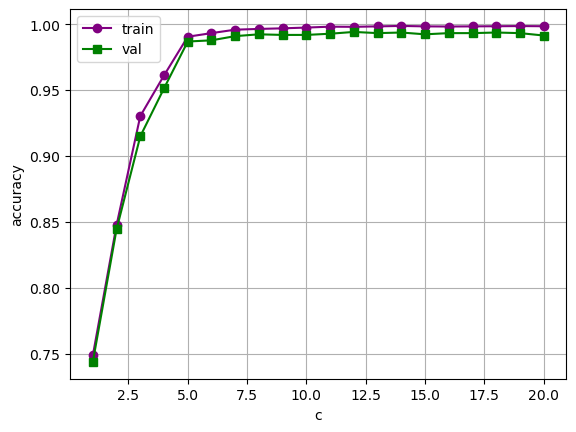

In [54]:
plt.plot(degrees,train_mean,label='training score',marker='o',color='purple')
plt.plot(degrees,val_mean,label='test score',marker='s',color='green')
plt.xlabel("c")
plt.ylabel("accuracy")
plt.grid()
plt.legend(['train','val'])
plt.show()

In [55]:
ypred=model.predict(xtest)

In [56]:
classes=['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

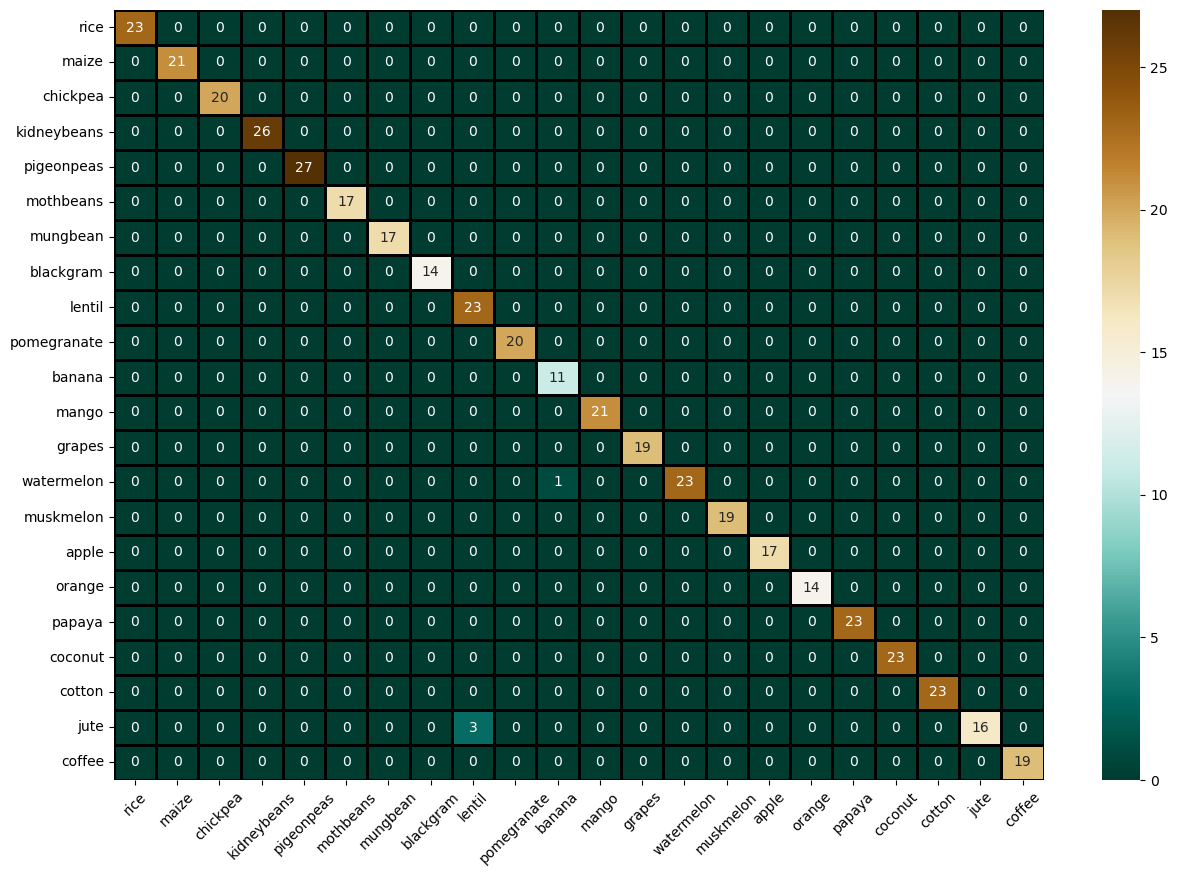

In [57]:
cm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='d',cmap=plt.cm.BrBG_r,xticklabels=classes,yticklabels=classes,linecolor='Black',linewidths=0.8)
plt.xticks(rotation=45)
plt.show()

In [58]:
metric=['Accuracy','Precision','Recall','F1 score']
score=[accuracy_score(ytest,ypred),precision_score(ytest,ypred,average='macro'),recall_score(ytest,ypred,average='macro'),f1_score(ytest,ypred,average='macro')]
score=[s*100 for s in score]

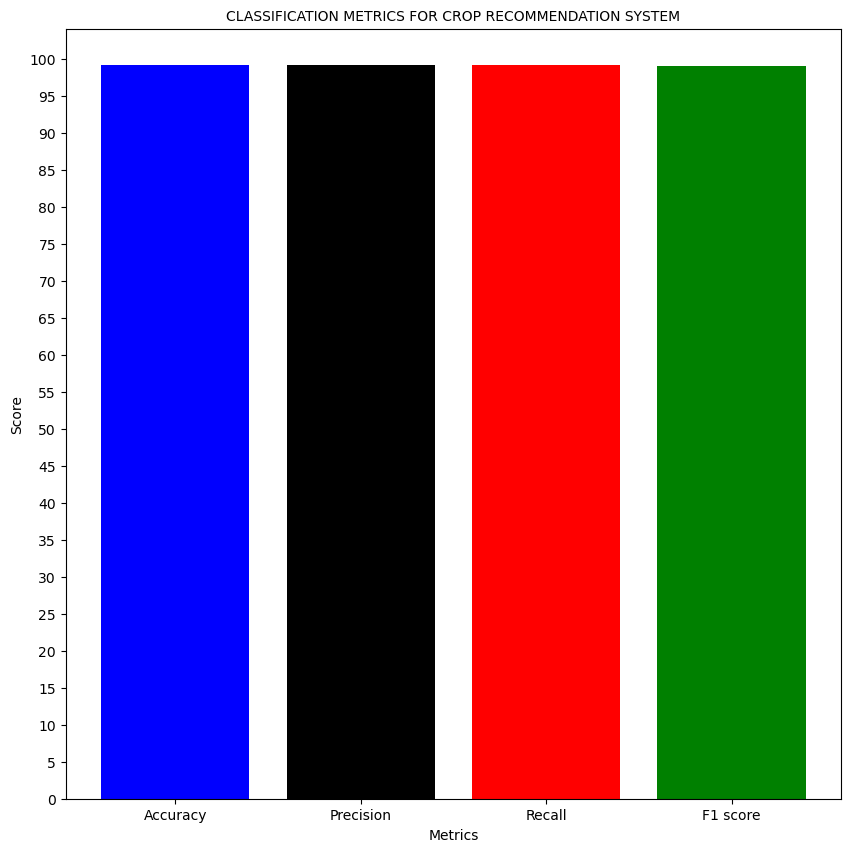

In [59]:
plt.figure(figsize=(10,10))
plt.bar(metric,score,color=['blue','black','red','green'])
plt.xlabel('Metrics')
plt.ylabel("Score")
plt.title("CLASSIFICATION METRICS FOR CROP RECOMMENDATION SYSTEM",fontsize=10)
plt.yticks(range(0,101,5))
plt.show()

In [62]:
import joblib 
joblib.dump(model,r"C:\Users\Avijit\Desktop\AgriAssure\CROP_RECOMMENDATION\MODELS\random_forest.pkl")

['C:\\Users\\Avijit\\Desktop\\AgriAssure\\CROP_RECOMMENDATION\\MODELS\\random_forest.pkl']

In [65]:
model.score(xtest,ytest)*100

99.0909090909091